In [1]:
%pip install numpy pandas matplotlib seaborn scikit-learn tensorflow

Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sab
import tensorflow as tf
from tensorflow import keras 
from tensorflow.keras import layers




In [3]:
#loading and printing the data sets 


datapathway = 'D:/PYTHON/2.datasets/kc_house_data.csv'

df = pd.read_csv(datapathway)



print(df)





#used to print first five datas
print(df.head())


#use to print the shape of the data 
print(df.shape)



#used to tell total number in rows and colums 
print(df.count())




print(df.describe())


#tell the data types 
print(df.dtypes)



               id             date     price  bedrooms  bathrooms  \
0      7129300520  20141013T000000  221900.0         3       1.00   
1      6414100192  20141209T000000  538000.0         3       2.25   
2      5631500400  20150225T000000  180000.0         2       1.00   
3      2487200875  20141209T000000  604000.0         4       3.00   
4      1954400510  20150218T000000  510000.0         3       2.00   
...           ...              ...       ...       ...        ...   
21608   263000018  20140521T000000  360000.0         3       2.50   
21609  6600060120  20150223T000000  400000.0         4       2.50   
21610  1523300141  20140623T000000  402101.0         2       0.75   
21611   291310100  20150116T000000  400000.0         3       2.50   
21612  1523300157  20141015T000000  325000.0         2       0.75   

       sqft_living  sqft_lot  floors  waterfront  view  ...  grade  \
0             1180      5650     1.0           0     0  ...      7   
1             2570      7242   

In [4]:
#######################################################
###################data preperation####################
#######################################################


#splitiing year from date 

df['regyear'] = df['date'].str[:4]

print(df['regyear'])



0        2014
1        2014
2        2015
3        2014
4        2015
         ... 
21608    2014
21609    2015
21610    2014
21611    2015
21612    2014
Name: regyear, Length: 21613, dtype: object


In [5]:
#converting data type 

df['regyear'] =df['regyear'].astype('int')

print(df['regyear'])

print(df.shape)

#adding a new column


df['houseage'] = np.nan


print(df.shape)

print(df['houseage'])




0        2014
1        2014
2        2015
3        2014
4        2015
         ... 
21608    2014
21609    2015
21610    2014
21611    2015
21612    2014
Name: regyear, Length: 21613, dtype: int64
(21613, 22)
(21613, 23)
0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
         ..
21608   NaN
21609   NaN
21610   NaN
21611   NaN
21612   NaN
Name: houseage, Length: 21613, dtype: float64


In [6]:
# calculating the age of houses 

for i, j in enumerate(df['yr_renovated']):
    if j == 0:
        df.loc[i, 'houseage'] = df.loc[i, 'regyear'] - df.loc[i, 'yr_built']
    else:
        df.loc[i, 'houseage'] = df.loc[i, 'regyear'] - df.loc[i, 'yr_renovated']

print(df['houseage'])


#removuing the invalid data , the aaxis is used to tell the system that we need to remove it from colounms and the inplace is used to
#tell that we need to make changes in the actual data not the copy data 

df.drop(['date','yr_built','yr_renovated','regyear'],axis=1,inplace=True)

print(df.head())





0        59.0
1        23.0
2        82.0
3        49.0
4        28.0
         ... 
21608     5.0
21609     1.0
21610     5.0
21611    11.0
21612     6.0
Name: houseage, Length: 21613, dtype: float64
           id     price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
0  7129300520  221900.0         3       1.00         1180      5650     1.0   
1  6414100192  538000.0         3       2.25         2570      7242     2.0   
2  5631500400  180000.0         2       1.00          770     10000     1.0   
3  2487200875  604000.0         4       3.00         1960      5000     1.0   
4  1954400510  510000.0         3       2.00         1680      8080     1.0   

   waterfront  view  condition  grade  sqft_above  sqft_basement  zipcode  \
0           0     0          3      7        1180              0    98178   
1           0     0          3      7        2170            400    98125   
2           0     0          3      6         770              0    98028   
3           0    

      price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  \
0  221900.0         3       1.00         1180      5650     1.0           0   
1  538000.0         3       2.25         2570      7242     2.0           0   
2  180000.0         2       1.00          770     10000     1.0           0   
3  604000.0         4       3.00         1960      5000     1.0           0   
4  510000.0         3       2.00         1680      8080     1.0           0   

   view  condition  grade  sqft_above  sqft_basement  sqft_living15  \
0     0          3      7        1180              0           1340   
1     0          3      7        2170            400           1690   
2     0          3      6         770              0           2720   
3     0          5      7        1050            910           1360   
4     0          3      8        1680              0           1800   

   sqft_lot15  houseage  
0        5650      59.0  
1        7639      23.0  
2        8062      8

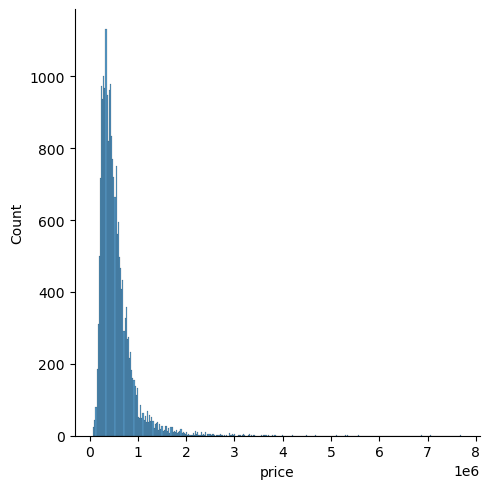

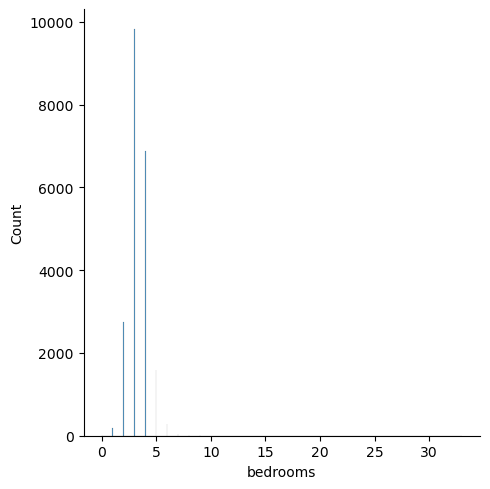

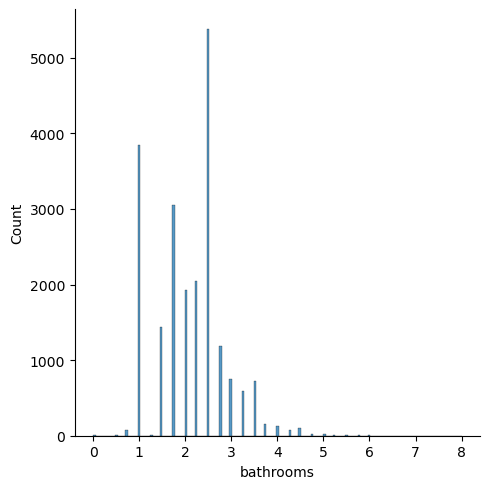

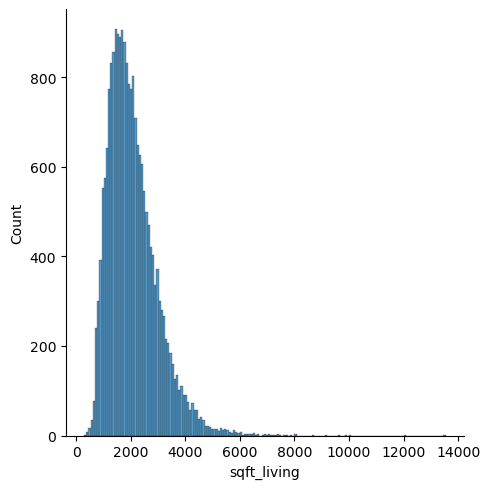

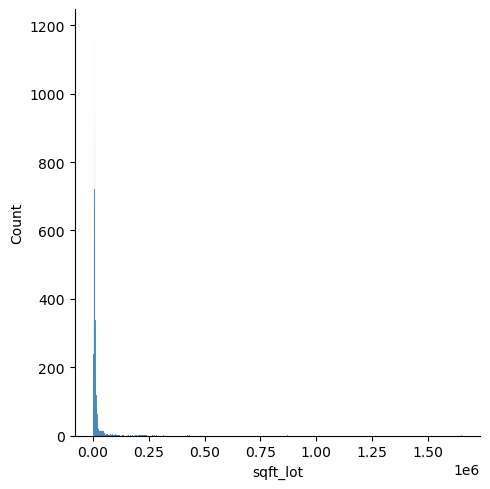

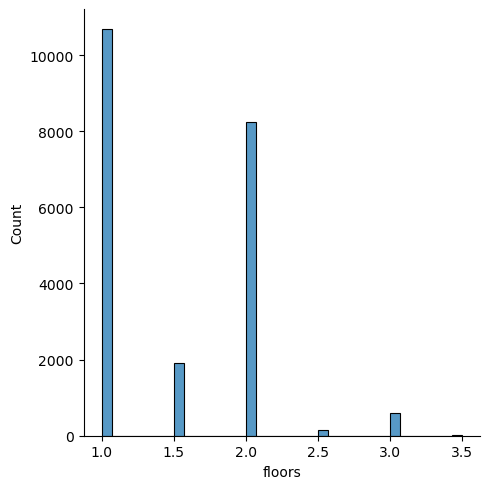

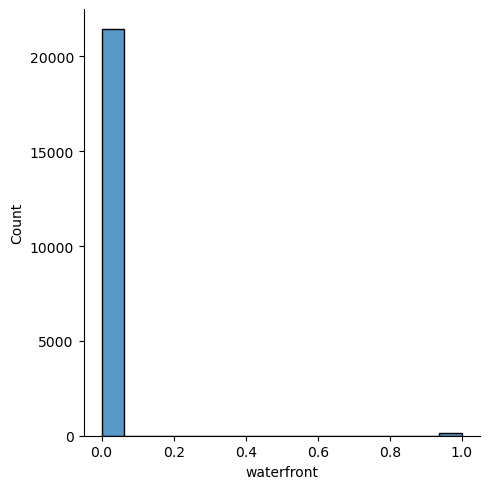

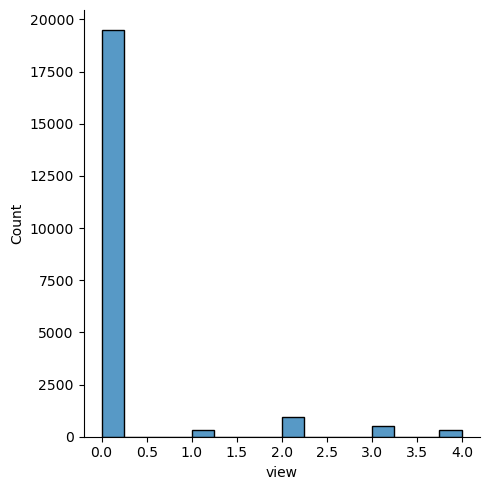

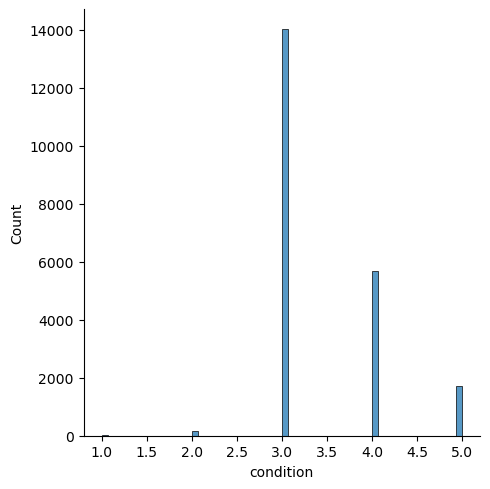

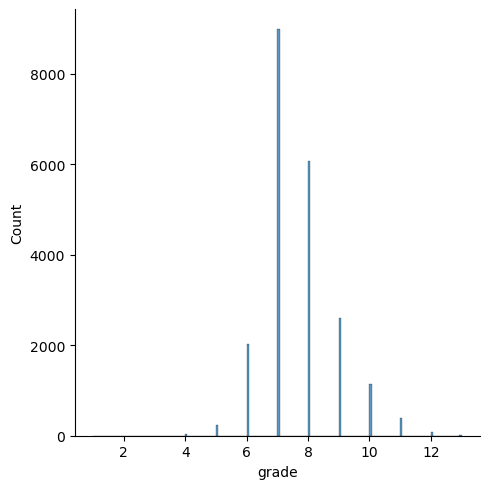

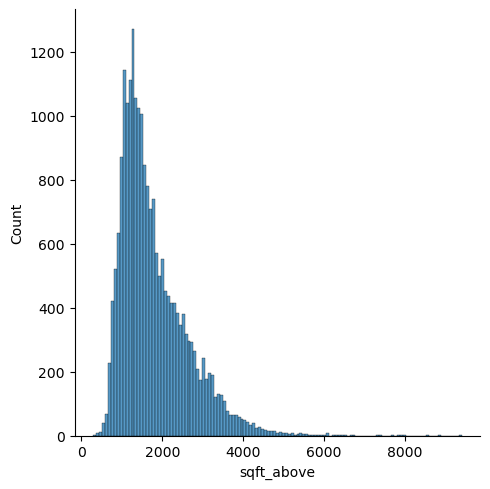

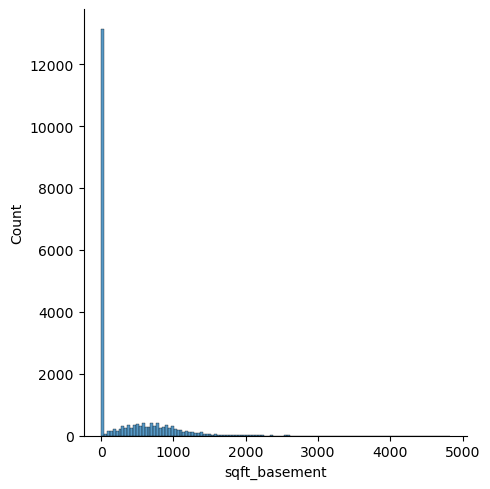

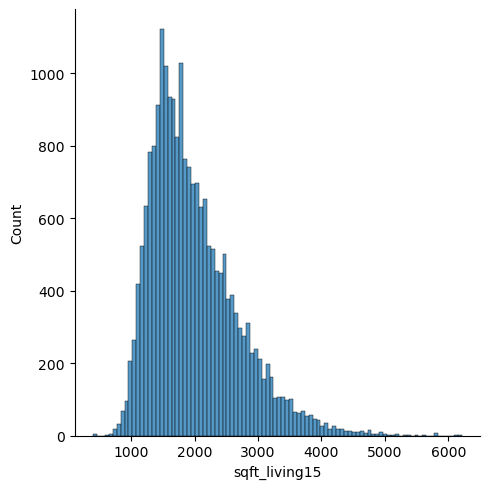

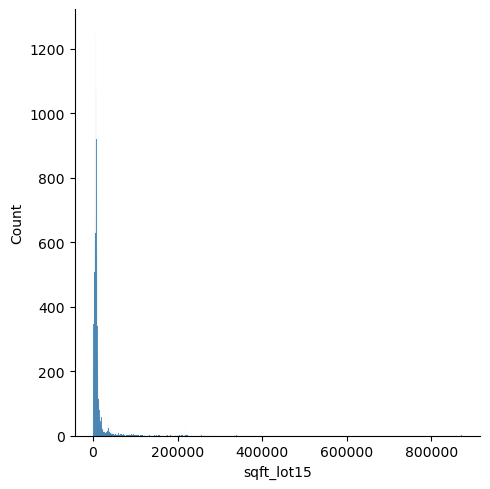

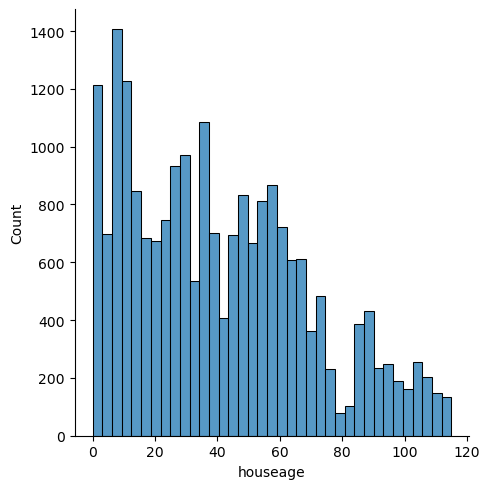

In [7]:
#removing irrelevant datas 


df.drop(['id','zipcode','lat','long'],axis=1,inplace=True)

print(df.head())
print(df.describe())


#removing false data from the datset (i.e.house age -1)

df = df[df['houseage']!=-1]
df.describe()

print(df.describe())



#visualizing data 

for i in df.columns :
    sab.displot(df[i])  

plt.show()



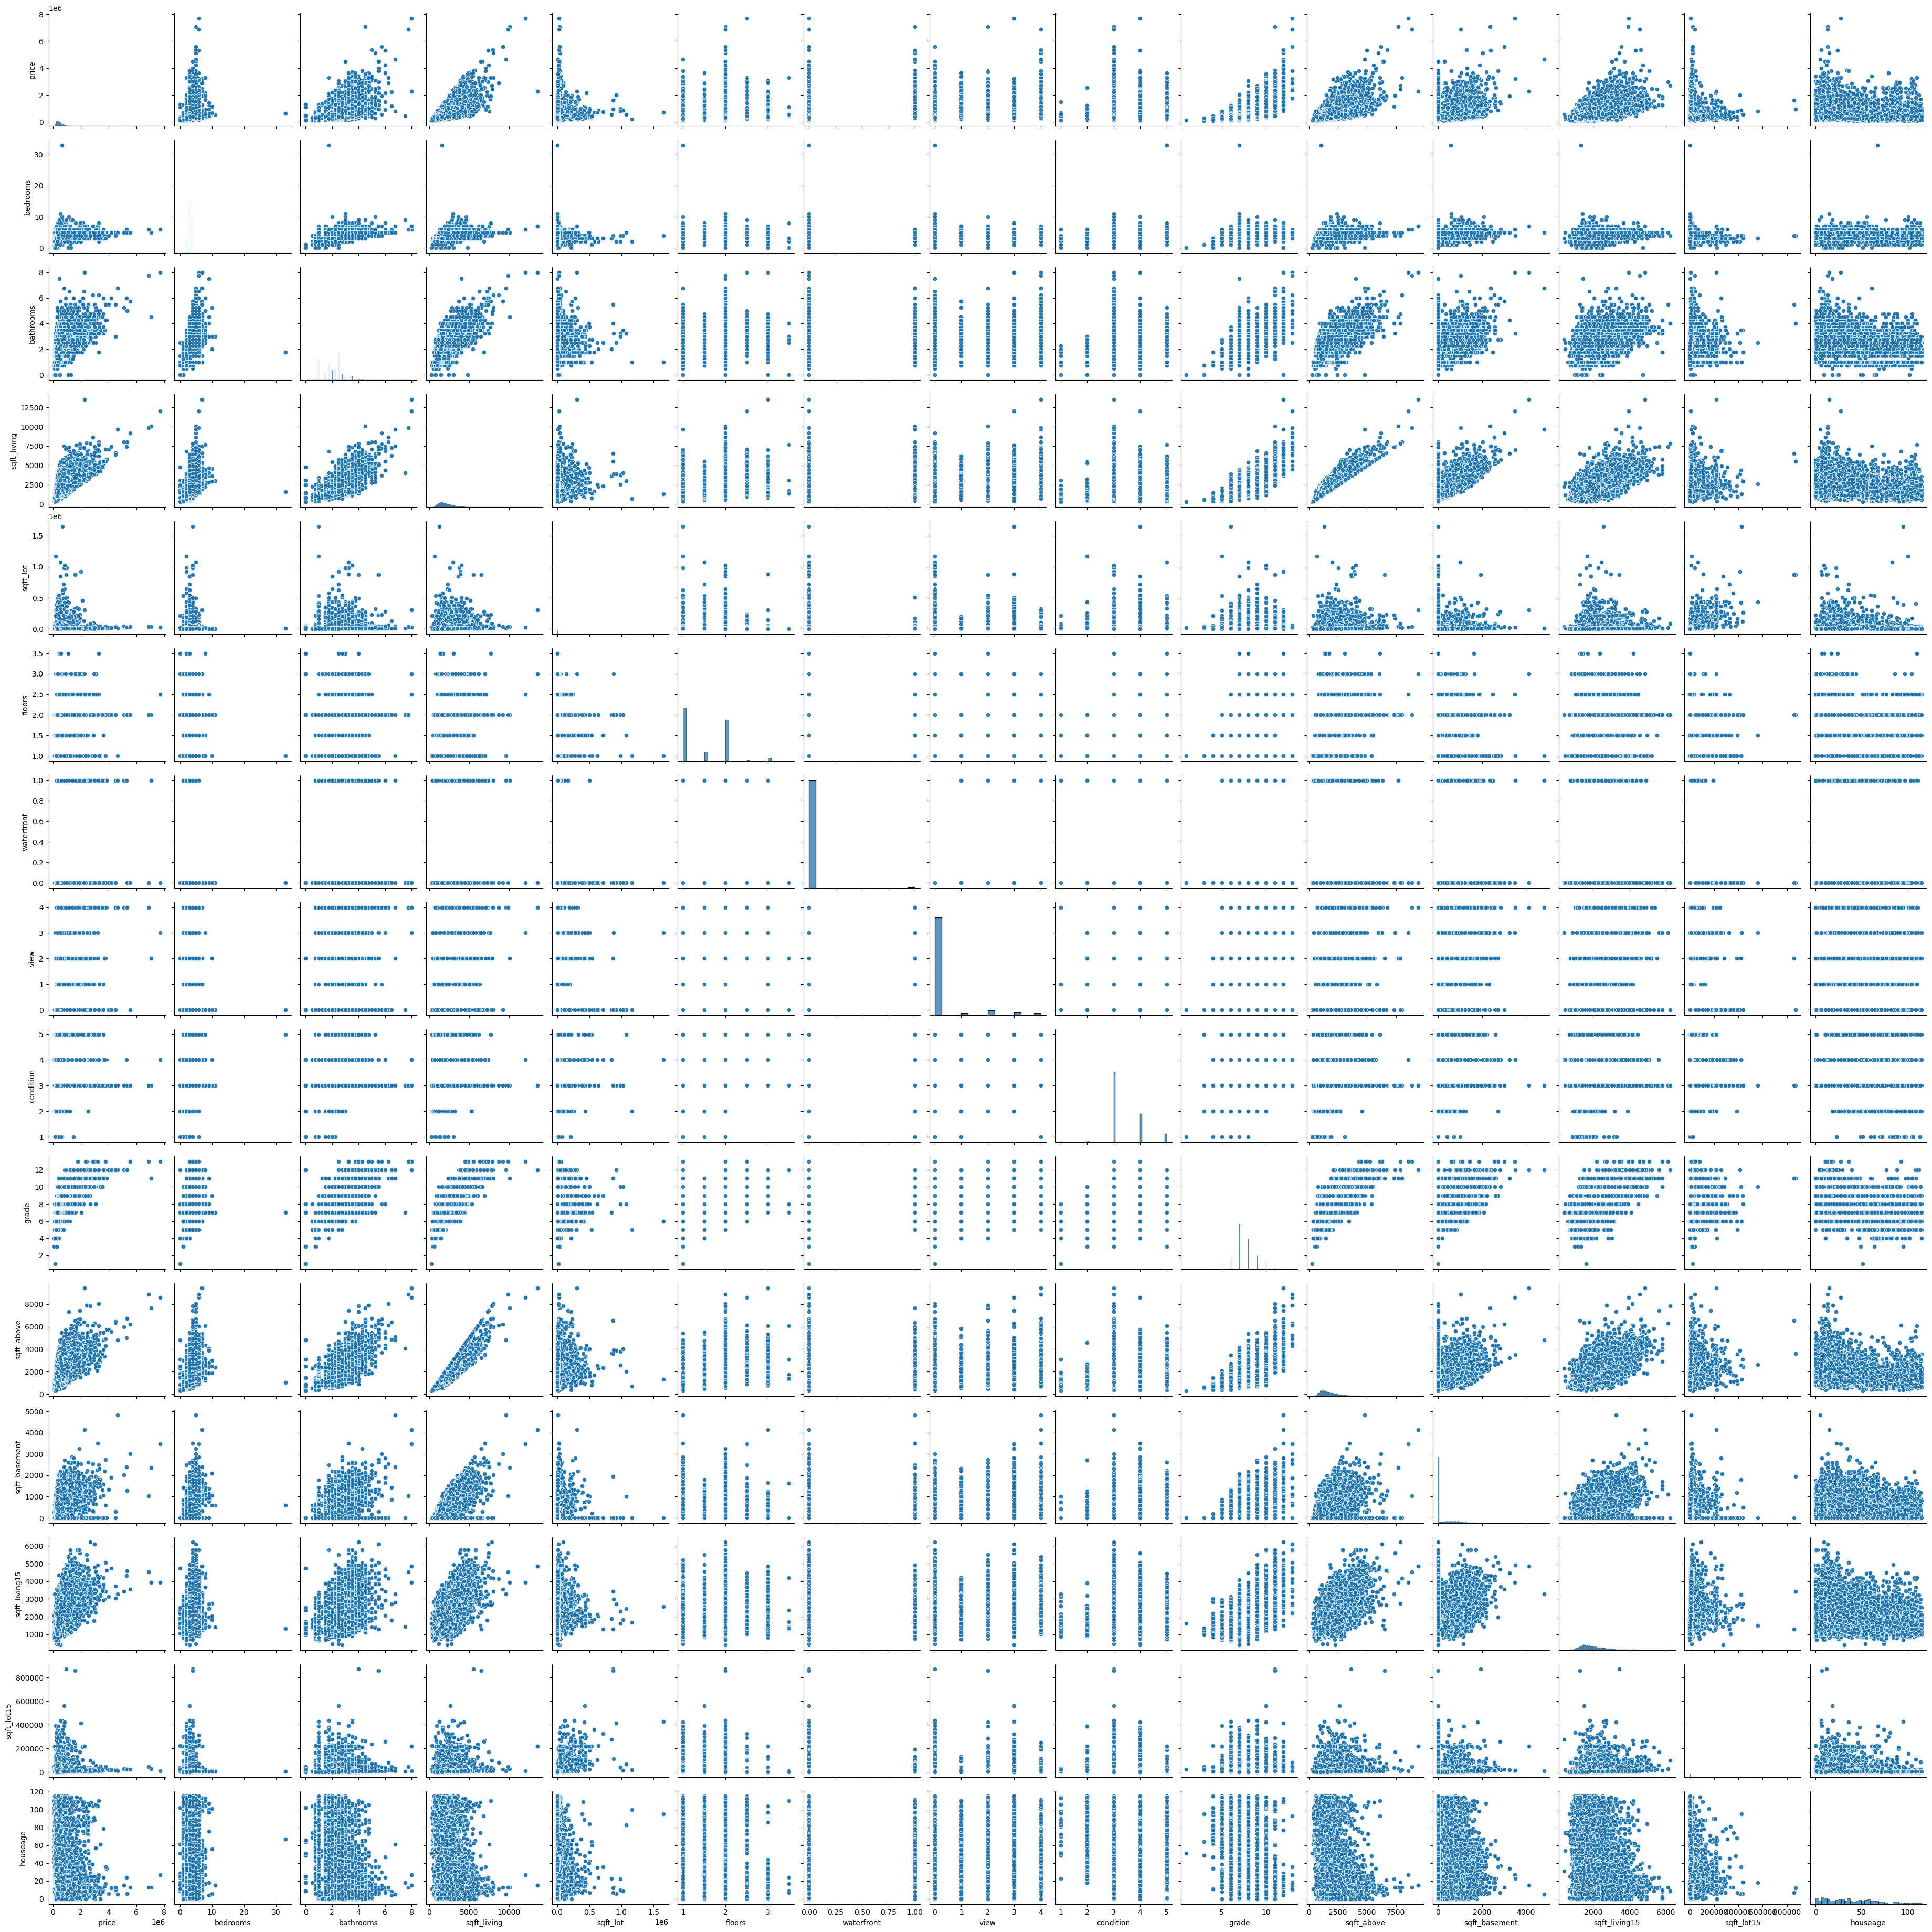

In [8]:
plt.Figure()
sab.pairplot(df)
plt.show()

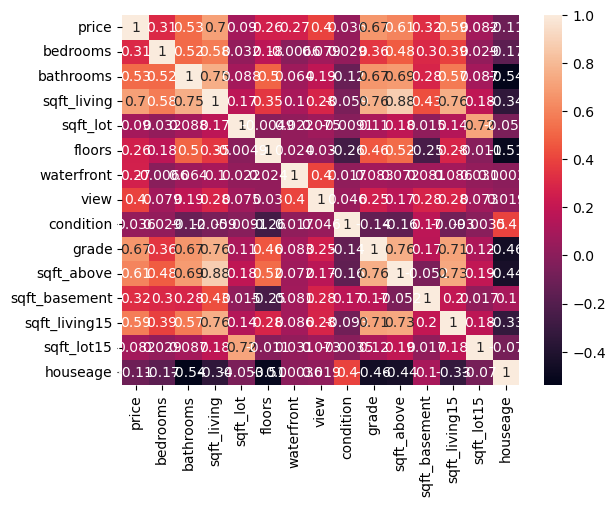

In [9]:
plt.Figure(figsize = (3000,3000))
sab.heatmap(df.corr(), annot = True)
plt.show()


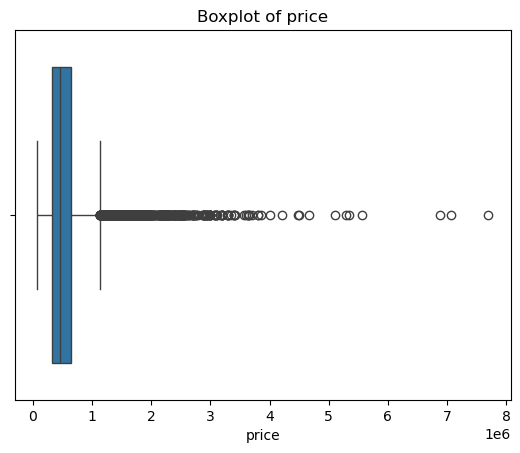

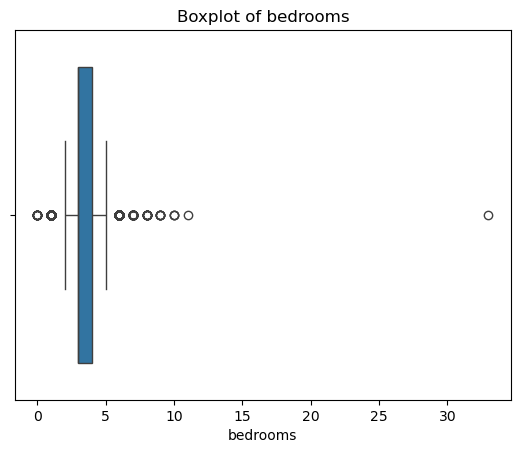

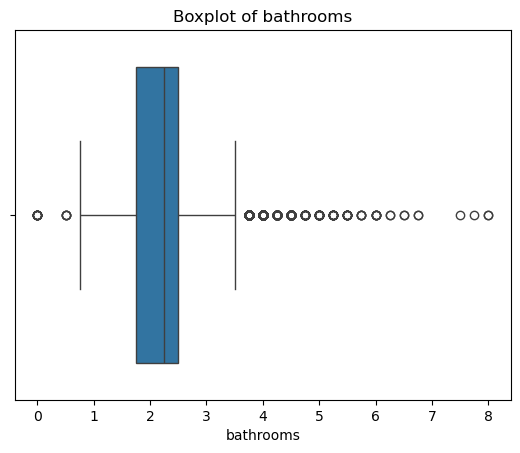

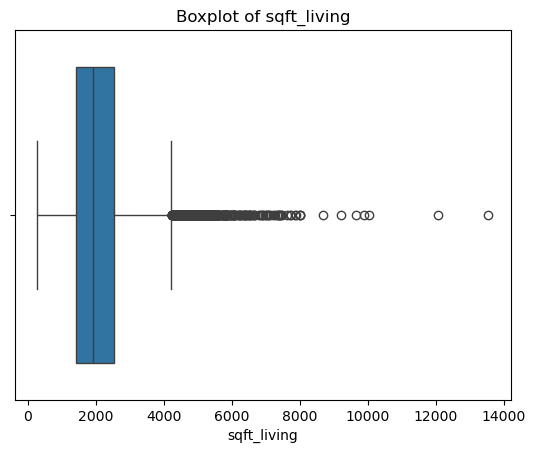

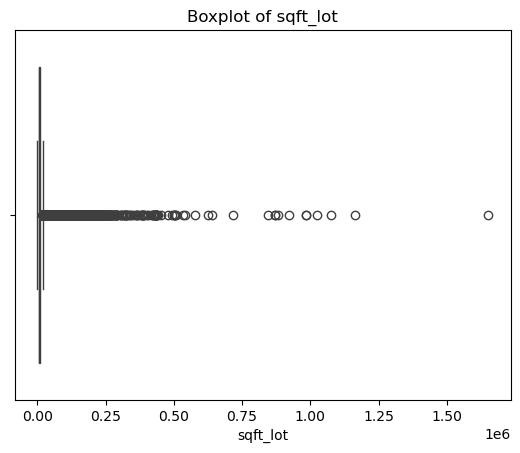

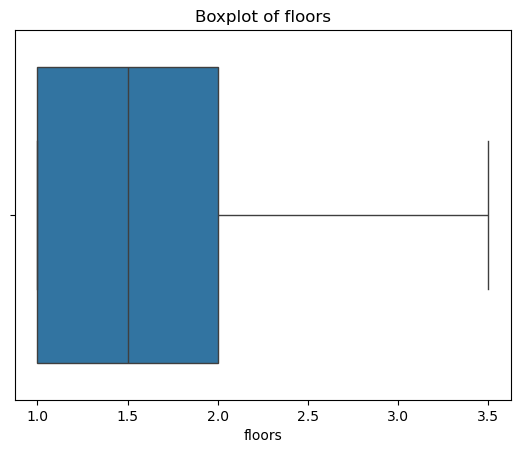

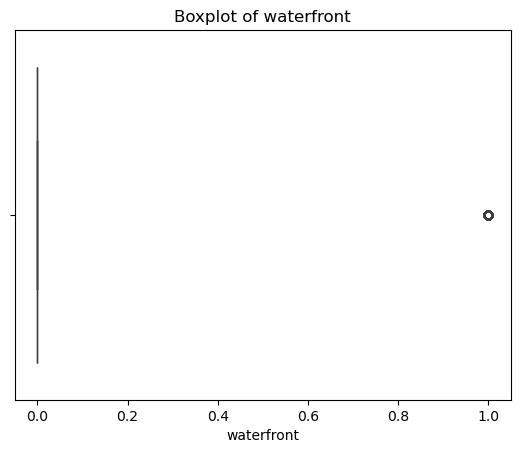

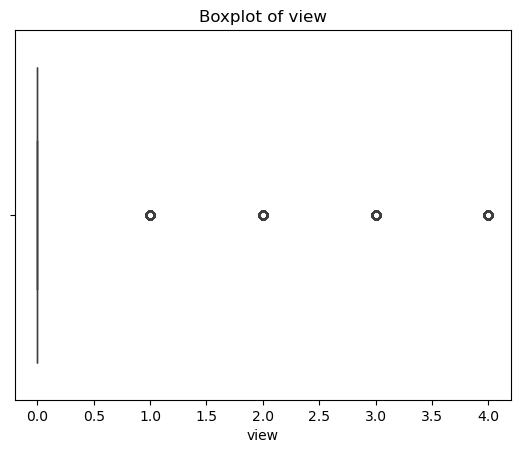

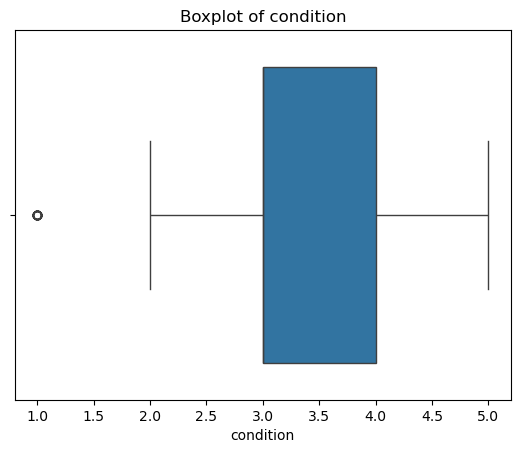

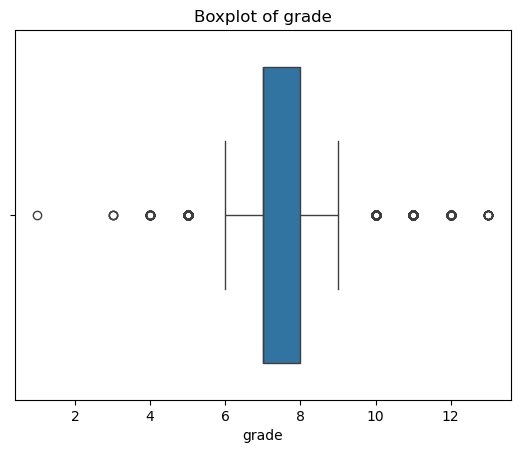

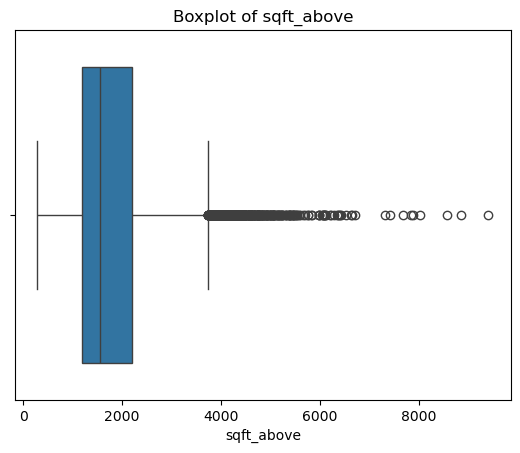

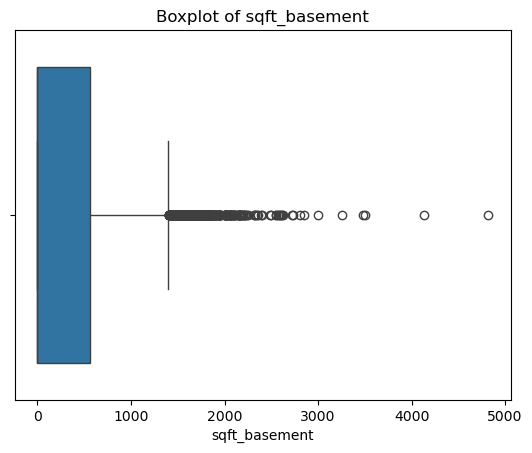

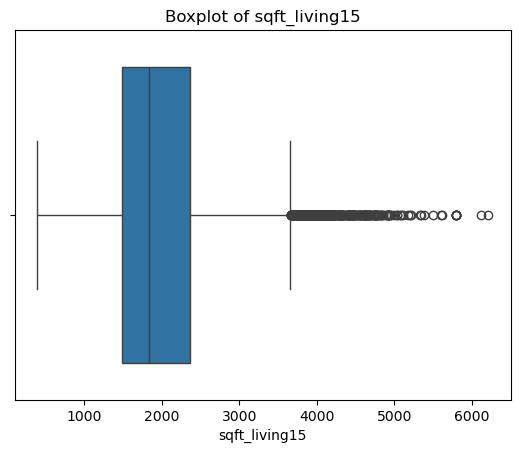

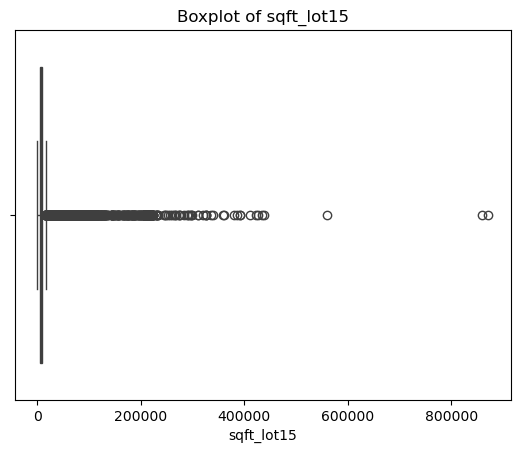

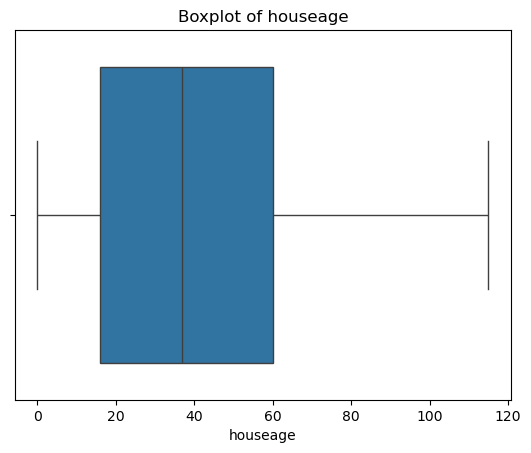

In [10]:
for i in df.columns:
    plt.figure()  # Create a new figure for each column
    sab.boxplot(x=df[i])  
    plt.title(f'Boxplot of {i}')
    plt.show()



In [11]:
###############################################################
########################### keras sequential model ############
###############################################################

In [12]:
#splitting the data frame into input x and output y 


x = df.drop('price',axis = 1)
y = df['price']


x.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,sqft_living15,sqft_lot15,houseage
0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1340,5650,59.0
1,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1690,7639,23.0
2,2,1.00,770,10000,1.0,0,0,3,6,770,0,2720,8062,82.0
3,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1360,5000,49.0
4,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1800,7503,28.0


In [13]:
#using default activation function (define model)

model = keras.Sequential()
model.add(layers.Dense(14, activation ='relu'))
model.add(layers.Dense(14, activation ='relu'))
model.add(layers.Dense(4, activation ='relu'))
model.add(layers.Dense(1))

#sumarize layer 

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [14]:
#compilation of model 
#first we used sge but it didnt work so we switch to adam which also didnt work
model.compile(optimizer='adam',loss='mse',metrics =['mse','mae','mape'])


#using fit function (validation split tells the percent of data used for validation purposes
# batch size is used to increase sped of model  )

history = model.fit(x,y, validation_split=0.33,batch_size=32,epochs=100)
 




Epoch 1/100
453/453 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - loss: 371798507520.0000 - mae: 483133.2500 - mape: 89.0876 - mse: 371798507520.0000 - val_loss: 345323503616.0000 - val_mae: 461898.0312 - val_mape: 80.3077 - val_mse: 345323503616.0000
Epoch 2/100
453/453 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 304899817472.0000 - mae: 410887.7500 - mape: 73.0615 - mse: 304899817472.0000 - val_loss: 292121116672.0000 - val_mae: 407609.5312 - val_mape: 69.0366 - val_mse: 292121116672.0000
Epoch 3/100
453/453 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 232793178112.0000 - mae: 331971.2500 - mape: 56.1314 - mse: 232793178112.0000 - val_loss: 177338908672.0000 - val_mae: 285729.1875 - val_mape: 44.5527 - val_mse: 177338908672.0000
Epoch 4/100
453/453 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 97870569472.0000 - mae: 190946.8281 - mape: 36.3406 - mse: 97870569472.0000 - val_loss: 70775111680.0000 - val_mae: 176809.3281 - val_mape: 36.5117 - val_mse: 70775111680.0000
Epoch 5/100
453/453 ━━━━━━━━━━━━━━━━━━━━

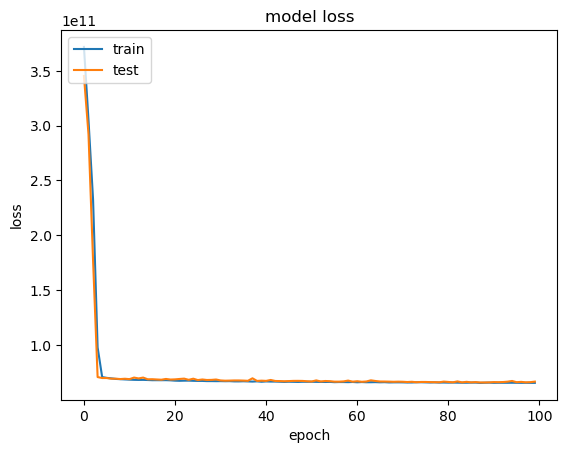

In [15]:
#step7 visalize and prediction 

plt.plot(history.history['loss'])

plt.plot(history.history['val_loss'])

plt.title('model loss')

plt.ylabel('loss')

plt.xlabel('epoch')

plt.legend(['train','test'],loc='upper left')

plt.show()


In [20]:
import numpy 

from numpy import array


xnew = array([[20,      # no of bedroom
               20,      # no of bathrooms
               1280,    # sqft-living
               5550,    # sqft-lot
               1,       # floors
               2,       # waterfront
               4,       # view
               4,       # condition
               7,       # grade
               2280,    # sqft-above
               0,       # sqft-basement
               1440,    # sqft-living15
               5750,    # sqft-lot
               100      # houseage
               ]])



#converting the data into float data for the system to analyze easily

xnew = numpy.array(xnew,dtype=numpy.float64)

#predication model
ynew = model.predict(xnew)

print(ynew[0])


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
[479460.2]
